# Background

Our data was taken from survey responses from 552 singles across 21 speed dating events from October 2002 until April 2004. The organizers of the events kept in touch with the singles and surveyed them several times before, during, and after the events.

For our analysis, we explored the responses to 3 survey questions:

 - What qualities are you looking for in a partner?
 - How do you grade yourself on those qualities?
 - What is your primary goal in participating in this event?

Since at events 6-9 some of the questions were scaled differently, we excluded these events and focused on 17 events. These included 449 participants for our analysis.

# Initialization

In [95]:
#pip install "jupyter_server>=2.0.0"

In [96]:
#pip install jupyterlab-link-share

In [97]:
#pip install plotly==4.5.4

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
# Use Plotly locally
#cf.go_offline()

In [99]:
#df = pd.read_csv("https://raw.githubusercontent.com/dataPracticum/code_pudding_v2/main/speed%20dating/Speed%20Dating%20Data.csv", encoding =('Windows-1252'),low_memory =False)

In [100]:
#df.to_csv('Speed_Date.csv')

In [101]:
# Loading the data
try:
    df = pd.read_csv('datasets/Speed_Date.csv')
except:
     df = pd.read_csv('Speed_Date.csv')

In [102]:
# Expanding the view of the large dataset

pd.options.display.max_columns = 200 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 500 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

In [103]:
# Reviewing the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 196 entries, Unnamed: 0 to amb5_3
dtypes: float64(174), int64(14), object(8)
memory usage: 12.5+ MB


There are 8378 entries and 196 columns.

In [104]:
# Checking the first rows

df.head()

,Unnamed: 0,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,

# Data Preprocessing

In [105]:
# Checking duplicates in the data

df.duplicated().value_counts()

False    8378
dtype: int64

In [106]:
# Checking for missing values

df.isnull().sum()

Unnamed: 0       0
iid              0
id               1
gender           0
idg              0
condtn           0
wave             0
round            0
position         0
positin1      1846
order            0
partner          0
pid             10
match            0
int_corr       158
samerace         0
age_o          104
race_o          73
pf_o_att        89
pf_o_sin        89
pf_o_int        89
pf_o_fun        98
pf_o_amb       107
pf_o_sha       129
dec_o            0
attr_o         212
sinc_o         287
intel_o        306
fun_o          360
amb_o          722
shar_o        1076
like_o         250
prob_o         318
met_o          385
age             95
field           63
field_cd        82
undergra      3464
mn_sat        5245
tuition       4795
race            63
imprace         79
imprelig        79
from            79
zipcode       1064
income        4099
goal            79
date            97
go_out          79
career          89
career_c       138
sports          79
tvsports    

There are missing values in certain columns. Let's explore the data to see how it is organized and why there may be missing values. We need to find out why there are missing values before we can address them.

In [107]:
# Exploring the number of waves or speed-dating events in the study

df['wave'].value_counts().sort_index()

1     200
2     608
3     200
4     648
5     190
6      50
7     512
8     200
9     800
10    162
11    882
12    392
13    180
14    720
15    684
16     96
17    280
18     72
19    450
20     84
21    968
Name: wave, dtype: int64

The data is based on 21 speed dating events. Some of the data was collected differently at the events so there are different numbers of rows for each wave. Let's check if the data can be organized by participants.

In [108]:
# Checking unique values of iid - participant unique identification number

df['iid'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

There are 552 unique participants in the study.

## Focus of the Study

We will focus on the data for the specific questions in the speed dating surveys given to participants across the events. The data on "What you are looking for in a partner" is scaled differently for waves 6-9 and waves 1-5, 10-21. So we will resample the data and select only the data from waves (or events) 1-5, 10-21 to create a dataframe of 17 events for our analysis.

In [109]:
# Creating a new dataframe based on data slice not including waves 6-9
df_new = df.query('wave not in [6,7,8,9]').copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6816 entries, 0 to 8377
Columns: 196 entries, Unnamed: 0 to amb5_3
dtypes: float64(174), int64(14), object(8)
memory usage: 10.2+ MB


In [110]:
# Checking the wave counts in the new dataframe
df_new['wave'].unique()

array([ 1,  2,  3,  4,  5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
      dtype=int64)

In [111]:
# Checking the number of unique iid or participants in the dataframe
unique_ids = df_new['iid'].value_counts()
unique_ids.describe()

count    449.000000
mean      15.180401
std        5.022802
min        6.000000
25%       10.000000
50%       16.000000
75%       19.000000
max       22.000000
Name: iid, dtype: float64

The df_new we will focus on has 6818 entries. The data focuses on 17 events, with 449 unique participants.

## Demographics

Here are some demographics on the people in the study grouped by participants. Since each participant filled out the demographic information multiple times in the study, it is provided in multiple rows. We organized the demographic information based on the iid of each participant.

## Age

In [112]:
# Age distribution

age_table = df_new.groupby('iid')['age'].mean()

In [113]:
age_table.describe()

count    442.000000
mean      26.276018
std        3.813190
min       18.000000
25%       23.250000
50%       26.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

In [114]:
# Checking for missing values in age column
df_new['age'].isnull().sum()

90

In [115]:
# Filling NaN values with mean of all ages = 26
df_new['age'].fillna('26', inplace=True) 

In [116]:
df_new['age'] = df_new['age'].astype(int)

In [117]:
# Age statistics

df_new['age'].describe()

count    6816.000000
mean       26.278022
std         3.562710
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

Average age was 26, with a range from 18-55.

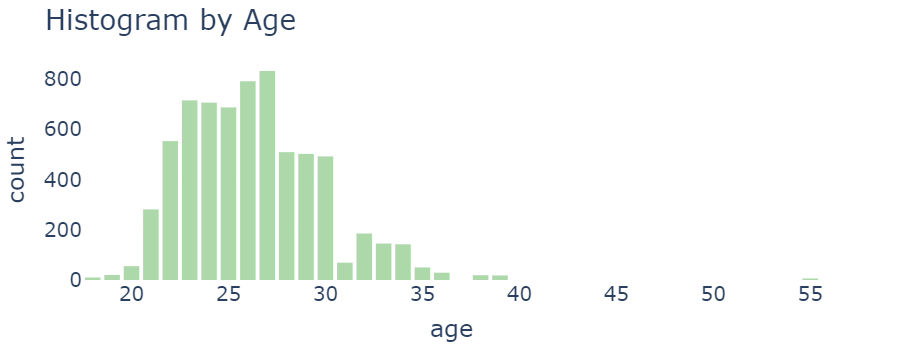

In [118]:
# Creating an interactive histogram in plotly

fig1 = px.histogram(df_new, x="age", color_discrete_sequence=['rgb(172, 216, 170)'])
fig1.update_layout(bargap=0.2)
fig1.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 20,
                   title = 'Histogram by Age'
)
fig1.show()


In [119]:
#fig1.write_html('datasets/html_final/Fig1_Age_Histogram_Final.html') #wrote html to file to share with SE team

## Gender

In [120]:
df_new['gender'].value_counts(normalize=True)

1    0.500734
0    0.499266
Name: gender, dtype: float64

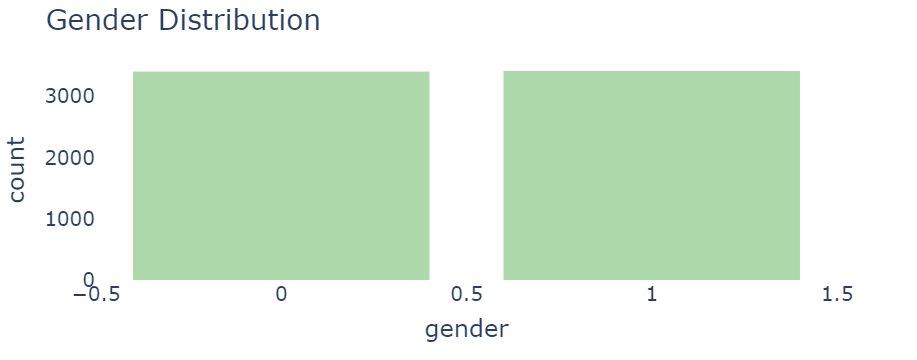

In [121]:
# Creating an interactive histogram in plotly

fig2 = px.histogram(df_new, x="gender", color_discrete_sequence=['rgb(172, 216, 170)'] )
fig2.update_layout(bargap=0.2)
fig2.update_layout(bargap=0.2)
fig2.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 20,
                   title = 'Gender Distribution'
)
fig2.show()

We did not end up using this figure in our final project.

## Race

In [122]:
# Converting race labels from integers to strings

df_new['races'] = df_new['race'].map({1:'Black/African American', 2:'European/Caucasian-American', 3:'Latino/Hispanic American', 4:'Asian/Pacific Islander/Asian-American', 5:'Native American', 6:'Other' }) 

In [123]:
# Race distribution - Calculating as a percentage

df_new['races'].value_counts(normalize=True)

European/Caucasian-American              0.560225
Asian/Pacific Islander/Asian-American    0.244007
Latino/Hispanic American                 0.084197
Other                                    0.065996
Black/African American                   0.045576
Name: races, dtype: float64

In [124]:
# Race distribution - Calculating as a percentage
df_new['races'].value_counts(normalize=True)
df_races_counts = df_new.groupby('races')['iid'].count()
df_races_counts = df_races_counts.to_frame(name='counts')
df_races_counts['races_2'] = df_races_counts.index
print(df_races_counts)


                                       counts  \
races                                           
Asian/Pacific Islander/Asian-American    1649   
Black/African American                    308   
European/Caucasian-American              3786   
Latino/Hispanic American                  569   
Other                                     446   

                                                                     races_2  
races                                                                         
Asian/Pacific Islander/Asian-American  Asian/Pacific Islander/Asian-American  
Black/African American                                Black/African American  
European/Caucasian-American                      European/Caucasian-American  
Latino/Hispanic American                            Latino/Hispanic American  
Other                                                                  Other  


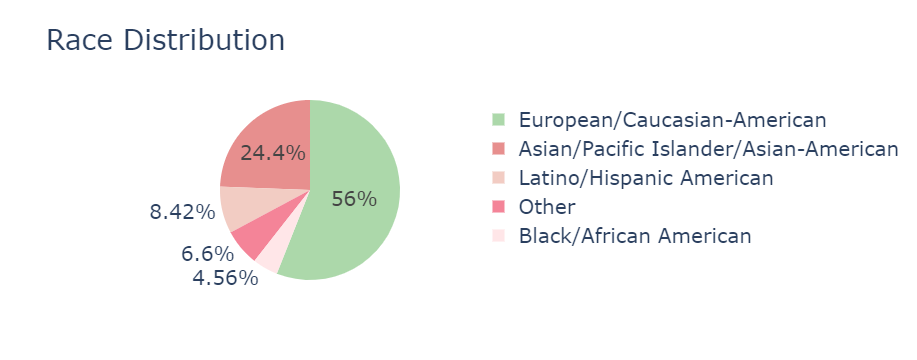

In [125]:
# Creating interctive pie chart with percentages of races
color_discrete_map1 = {'European/Caucasian-American': 'rgb(172, 216, 170)','Black/African American': 'rgb(255, 230, 232)','Asian/Pacific Islander/Asian-American': 'rgb(231, 143, 142)','Latino/Hispanic American': 'rgb(242, 204, 195)','Other':'rgb(244, 132, 152)'}
fig3 = px.pie(df_races_counts, values='counts',names='races_2', title='Race Distribution',color='races_2', color_discrete_map=color_discrete_map1)
fig3.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 20
)
fig3.show()


In [126]:
#fig3.write_html('datasets/html_final/Fig3_Race_Distribution_Pie_Final.html') #wrote html to file to share with SE team

# Exploratory Data Analysis

We will explore data about who matched most from the speed dating event, specifically looking at four questions:
what qualities these participants were looking for, how they ranked themselves on these qualities, and the importance of race and religion in choosing their partner.

We will group by iid to analyze the total number of matches each participant received in the study.

In [127]:
# Aggregating data to create a column of how many matches each participant received over the study

df_new['match_total'] = df_new['match'].groupby(df_new['iid']).sum()
df_new['match_total'].describe()

count    449.000000
mean       2.503341
std        2.317560
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       14.000000
Name: match_total, dtype: float64

After excluding the data on waves 6-9 from our analysis, 449 unique participants remained. Among these participants the range of matches any participant received was between 0-14.

In [128]:
# Creating a function to plot histograms
 
def hist_plot(data, column):
        fig, ax = plt.subplots(1, 1)
        ax.hist(data[column], bins=100)
        ax.set_title(column)
        ax.set_xlabel(column)
        ax.set_ylabel('frequency')
        plt.show()

In [129]:
df_match_total = df.pivot_table(index='iid',values='match',aggfunc=sum)

In [130]:
df_match_total['number_of_participants']= df_match_total.index

In [131]:
df_match_total2 =df_match_total.groupby('match').count()

In [132]:
df_match_total2['number_of_matches']=df_match_total2.index

In [133]:
df_match_total2

,number_of_participants,number_of_matches
match,,
0,99,0
1,125,1
2,117,2
3,64,3
4,45,4
5,39,5
6,24,6
7,13,7
8,17,8


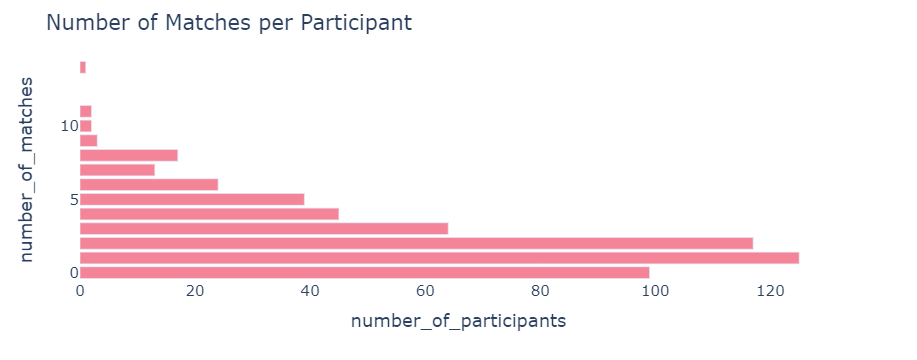

In [134]:
fig0 = px.bar(df_match_total2, x="number_of_participants", y="number_of_matches", orientation='h', color_discrete_sequence=['rgb(244, 132, 152)'])
fig0.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 15,
                   title = 'Number of Matches per Participant'
)
fig0.show()

In [135]:
#fig0.write_html('datasets/html_final/Fig0_Matches_per_Participant.html')

People tended to received very few matches from speed dating, with most people receiving 0-2 matches. Some people received between 8-14 matches. We would like to explore the differences between singles who recieved no matches and singles who received a high number of matches. We will divide up the participants into these two groups and analyze their responses to the 3 survey questions.

## Differences Between People With No Matches and High Matches

In [136]:
# Dividing participants into groups of people who received no matches and high matches

no_match = df_new.loc[df_new['match_total'] == 0]
high_match = df_new.loc[df_new['match_total'] >= 7]

In [137]:
no_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 3 to 543
Columns: 198 entries, Unnamed: 0 to match_total
dtypes: float64(174), int32(1), int64(14), object(9)
memory usage: 130.3+ KB


In [138]:
high_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 8 to 535
Columns: 198 entries, Unnamed: 0 to match_total
dtypes: float64(174), int32(1), int64(14), object(9)
memory usage: 49.6+ KB


There are 84 participants in the no match group who received 0 matches across 17 events.
There are 32 participants in the high match group who received 7 matches or more scross 17 events.

We will create a new column 'match_name' to assign participants to a match_name group based on how many matches he/she received. This match_name column will be used for further analysis and plotting.

In [139]:
# Creating a function to assign a match name based on match total values

def match_name(df):
    match_name = []
    for row in df_new['match_total']:
        if row == 0: match_name.append('no_match')
        elif row >= 7: match_name.append('high_match')
        else: match_name.append('avg_match')
    return match_name

In [140]:
# Creating new column 'match_name'
df_new['match_name'] = match_name(df_new['match_total'])

In [141]:
# Checking percentages of values in 'match_name'
df_new['match_name'].value_counts(normalize=True)

avg_match     0.982981
no_match      0.012324
high_match    0.004695
Name: match_name, dtype: float64

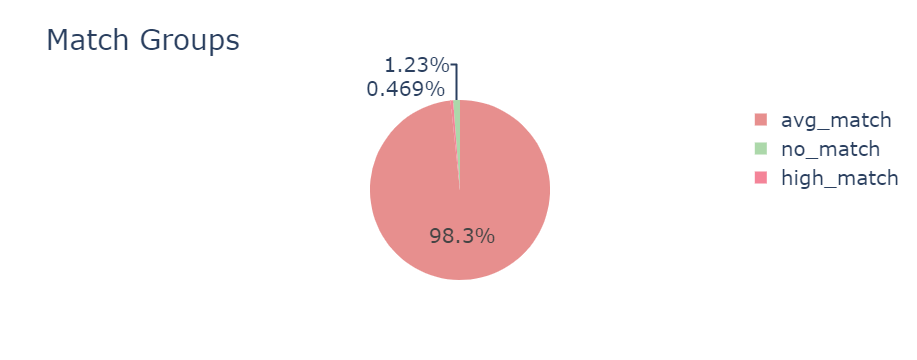

In [142]:
df_new_match = df_new.groupby('match_name')['iid'].count()
df_new_match = df_new_match.to_frame(name='counts')
df_new_match['has_a_match'] = df_new_match.index
df_new_match
#type(df_new_match)
color_discrete_map = {'avg_match': 'rgb(231, 143, 142)', 'no_match': 'rgb(172, 216, 170)', 'high_match': 'rgb(244, 132, 152)'}
fig5 = px.pie(df_new_match, values='counts',names='has_a_match', title='Match Groups', color='has_a_match', color_discrete_map=color_discrete_map )
fig5.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 20
)
fig5.show()

We did not use this chart in our final project.

In [143]:
#fig5.write_html('MatchGroups.html')

## Qualities Important in a Partner

We will use the data taken from before the first speed dating event. Singles were asked to assign a total of 100 points across 6 qualities to rate the importance of each quality to them in finding a partner. We will use pie charts to visualize the percentages of participants who chose each quality and compare this for each group. We will then create a dataframe from the analysis of this data to create a visual representation.

In [144]:
# Assigning all of the columns with attibutes to a list

att = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']

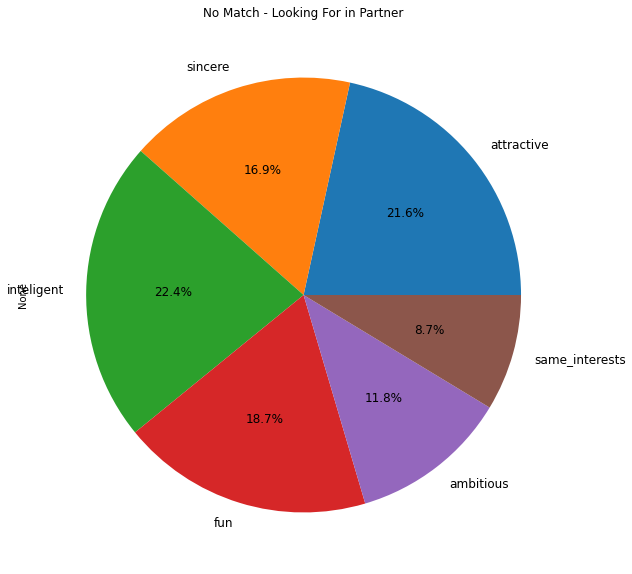

In [145]:
# Creating a pie chart with percentages of attributes for no_match group

no_match[att].sum().plot(autopct='%1.1f%%', kind='pie',figsize=(10,10),fontsize=12,labels=['attractive','sincere','inteligent','fun','ambitious','same_interests'],title="No Match - Looking For in Partner");

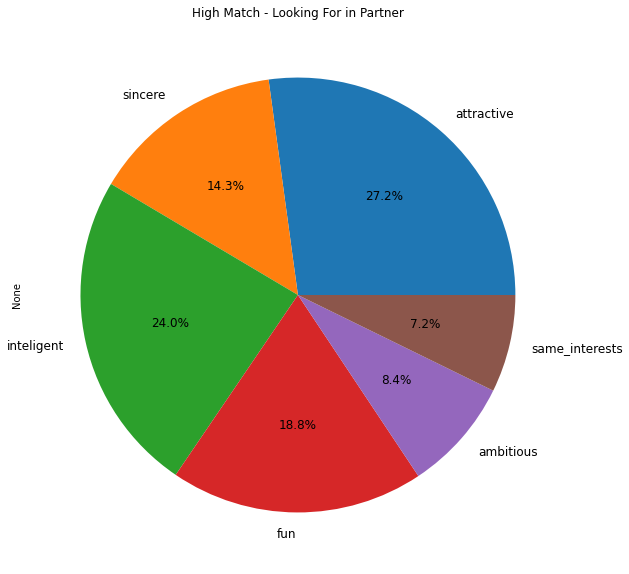

In [146]:
# Creating a pie chart with percentages of attributes for high_match group

high_match[att].sum().plot(autopct='%1.1f%%', kind='pie',figsize=(10,10),fontsize=12,labels=['attractive','sincere','inteligent','fun','ambitious','same_interests'],title="High Match - Looking For in Partner");

We will use the data taken from the pie charts to create a dataframe.

In [147]:
# Creating a dataframe with sums of each attribute according to match_name using pie chart values as percentages from above.

match_dict = {"Attributes": ['attractive','sincere','intelligent','fun','ambitious','same_interests'],
            'no_match': [21.6, 16.9, 22.4, 18.7, 11.8, 8.7],
            'high_match': [27.2, 14.3, 24.0, 18.8, 8.4, 7.2]}
#convert that into a dataframe
data_df = pd.DataFrame(match_dict)
#show the dictionary
data_df

,Attributes,no_match,high_match
0,attractive,21.6,27.2
1,sincere,16.9,14.3
2,intelligent,22.4,24.0
3,fun,18.7,18.8
4,ambitious,11.8,8.4
5,same_interests,8.7,7.2


In [148]:
# Creating a dataframe for a multiple barplot of importance of attributes from the condensed data above.

df_data2 = pd.DataFrame([['attractive', 'no_match',21.6],['attractive', 'high_match',27.2],['sincere', 'no_match',16.9],['sincere', 'high_match',14.3],
                   ['intelligent', 'no_match',22.4],['intelligent', 'high_match',24.0],['fun', 'no_match',18.7],['fun', 'high_match',18.8],
                   ['ambitious', 'no_match',11.8],['ambitious', 'high_match',8.4],['same_interests', 'no_match',8.7],['same_interests', 'high_match',7.2]
                   ], columns = ['qualities', 'match_group','percentage'])

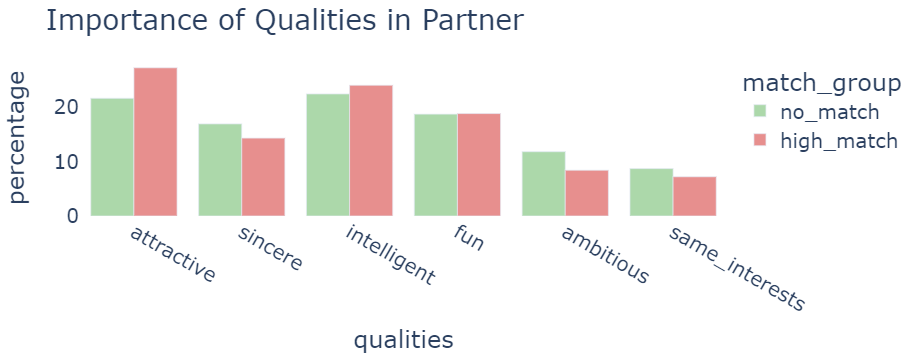

In [149]:
# Plotting a multiple barplot of importance of attributes

color_discrete_map = {'no_match': 'rgb(172, 216, 170)', 'high_match': 'rgb(231, 143, 142)'} #using one of the paletts that Colburn shared
fig6= px.bar(df_data2 , x='qualities', y='percentage', color='match_group', barmode= 'group',color_discrete_map=color_discrete_map )
fig6.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 20,
                   title = 'Importance of Qualities in Partner'
)
fig6.show()

In [150]:
#fig6.write_html('datasets/html_final/Fig6_Importance_Of_Qualities_In_Partner.html') #wrote html to file to share with SE team


People with more matches ranked attractive and intelligent as slightly more important than people with no matches. On the other hand, qualities that are difficult to see on a speed dating event such as sincere and ambitious were slightly more important to people with no matches. It could be that since it is difficult to see these qualities on a speed dating event, these singles did not find any matches. Well at least the no match and high match singles had one thing in common: they were both looking for fun!

## Self Grading

We will analyze the responses to the question how to rate yourself on these same qualities. We will follow the same method as above to create the chart.

In [151]:
self_att = ['attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1']

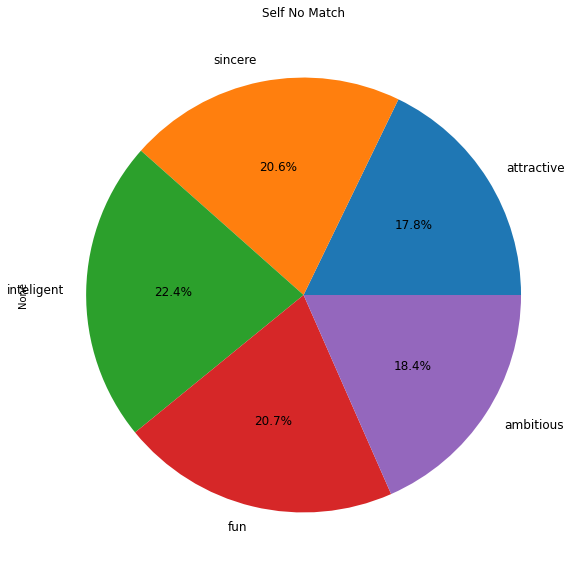

In [152]:

no_match[self_att].sum().plot(autopct='%1.1f%%', kind='pie',figsize=(10,10),fontsize=12,labels=['attractive','sincere','inteligent','fun','ambitious','same_interests'],title="Self No Match");

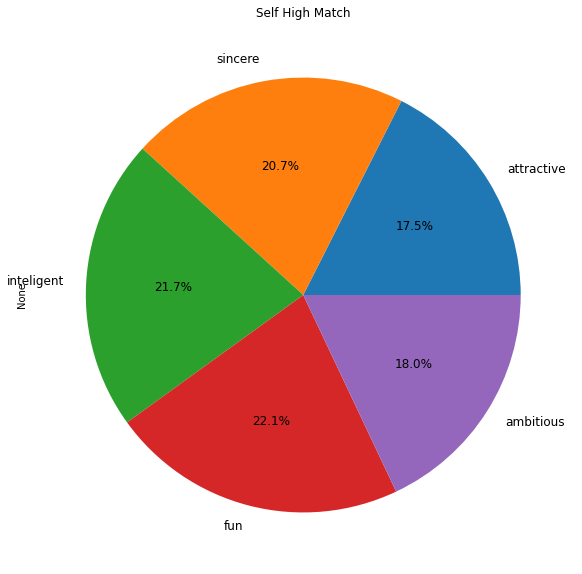

In [153]:
high_match[self_att].sum().plot(autopct='%1.1f%%', kind='pie',figsize=(10,10),fontsize=12,labels=['attractive','sincere','inteligent','fun','ambitious','same_interests'],title="Self High Match");

In [154]:
# Dataframe for Self Grading Bar Plot

df_data3 = pd.DataFrame([['attractive', 'no_match',17.8],['attractive', 'high_match',17.5],['sincere', 'no_match',20.6],['sincere', 'high_match',20.7],
                   ['intelligent', 'no_match',22.4],['intelligent', 'high_match',21.7],['fun', 'no_match',20.7],['fun', 'high_match',22.1],
                   ['ambitious', 'no_match',18.4],['ambitious', 'high_match',18.0]
                   ], columns = ['qualities', 'match_group','percentage'])

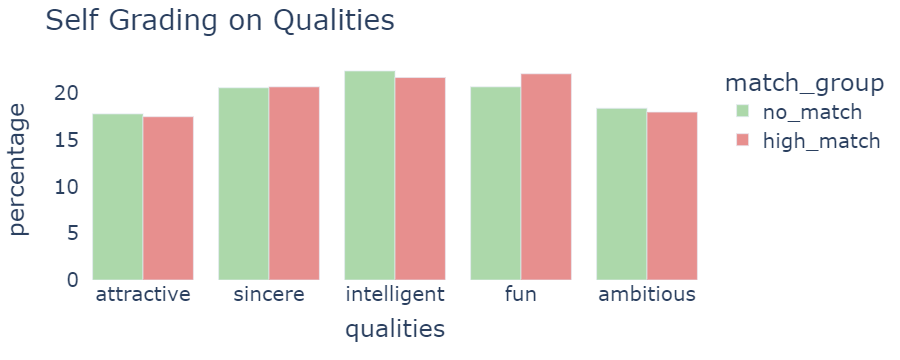

In [155]:
# Self Grading Multiple Bar Plot
color_discrete_map = {'no_match': 'rgb(172, 216, 170)', 'high_match': 'rgb(231, 143, 142)'} #using one of the paletts that Colburn shared
fig7= px.bar(df_data3 , x='qualities', y='percentage', color='match_group', barmode= 'group',color_discrete_map=color_discrete_map )
fig7.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
                   plot_bgcolor = "rgba(0,0,0,0)",
                   font_family = "verdana",
                   font_size = 20,
                   title = "Self Grading on Qualities"
)

fig7.show()


In [157]:
#fig7.write_html('datasets/html_final/Fig7_Self_Grading_Qualities.html')

People graded themselves on a scale of 1-10 for these same qualities. We would have thought that the high match group would have had higher scores for attractive or fun. Surprisingly, people with no matches and high matches graded themselves similarly for all qualities, especially sincere. LOL!

## Primary Goal in Participating in this Event

We will analyze the question: What is your primary goal in participating in this event? The responses were coded in the dataframe. We will convert the integer values in goals to strings according to the survey to make labels for the chart. We will create a radar chart for visualization.

In [158]:
# Mapping numbers to actual goals for df_new and exploring the percentages of participants who chose each goal

df_new['goal_name'] = df_new['goal'].map({1:'Fun night out', 2:'Meet new people', 3:'Get a date', 4:'Looking for a serious relationship', 5:'Say I did it', 6:'Other' }) 
df_new['goal_name'].value_counts(normalize=True)

Fun night out                         0.406259
Meet new people                       0.369623
Get a date                            0.076980
Say I did it                          0.064076
Other                                 0.052358
Looking for a serious relationship    0.030703
Name: goal_name, dtype: float64

In [159]:
# Dividing df_new data into no_match and high_match groups after mapping labels to the goal data

no_match = df_new.loc[df_new['match_total'] == 0]
high_match = df_new.loc[df_new['match_total'] >= 7]

We will calculate the percentages of participants who chose each goal for each participant.

In [161]:
no_match['goal_name'].value_counts(normalize=True)

Meet new people    0.443038
Fun night out      0.443038
Other              0.063291
Say I did it       0.050633
Name: goal_name, dtype: float64

In [162]:
high_match['goal_name'].value_counts(normalize=True)

Fun night out      0.53125
Meet new people    0.37500
Say I did it       0.06250
Other              0.03125
Name: goal_name, dtype: float64

In [163]:
df_data3 = pd.DataFrame([['meet new people', 'no_match',4.4],['meet new people', 'high_match',3.8],['fun night out', 'no_match',4.4],['fun night out', 'high_match',5.3],
                   ['say I did it', 'no_match',.5],['say I did it', 'high_match',.6],['other', 'no_match',.6],['other', 'high_match',.3],
                   ['get a date', 'no_match',0],['get a date', 'high_match',0],['looking for a serious relationship', 'no_match',0],['looking for a serious relationship', 'high_match',0]
                   ], columns = ['categories', 'match_group','percentage'])

In [165]:
#df_data3.to_json('datasets/html_final/goal_radar_graph.json')

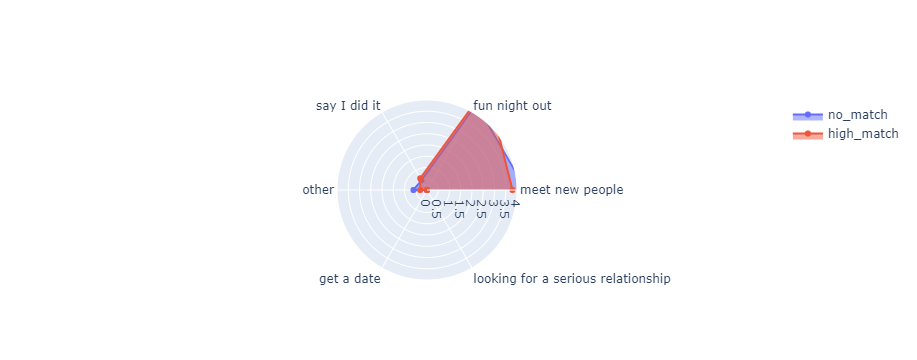

In [166]:
# Plotting a multiple trace radar chart in plotly

import plotly.graph_objects as go

categories = ['meet new people','fun night out','say I did it',
              'other', 'get a date', 'looking for a serious relationship']

fig8 = go.Figure()

fig8.add_trace(go.Scatterpolar(
      r=[4.4, 4.4, .5, .6, 0, 0],
      theta=categories,
      fill='toself',
      name='no_match'
))
fig8.add_trace(go.Scatterpolar(
      r=[3.8, 5.3, .6, .3, 0, 0],
      theta=categories,
      fill='toself',
      name='high_match'
))

fig8.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 4]
    )),
  showlegend=True
)

fig8.show()

In [ ]:
#fig8.write_html('Goals.html')

People were asked “What is your primary goal in participating in this event?“ Interestingly, “Meet new people” and “Fun night out” were the most popular goals for people in both the no match and high match groups. But in the high match group, more people had a goal of a fun night out, 53%. Interestingly, "Get a date" and "Looking for a serious relationship", the two goals we would have thought would be common were not chosen by any participants.

# Summary

Who would have thought that singles going to a speed dating event were not mostly interested in getting a date or looking for a relationship? Seriously! If so, it explains our finding that most singles received only 2 matches or less from 17 events.

Although there were slight differences, there was not a significant difference between what singles were looking for and how they graded themselves on those same qualities.

If the participants were mainly interested in having fun and meeting new people, they may have achieved their goal after all even if that means they did not get matches at the speed dating events. 